In [97]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, neural_network
import sklearn as sk
plt.rcParams['figure.figsize'] = [12, 4]
# rcParams: Matplotlib ayarlarını depolar.
# figure.figsize : Grafik boyutu parametresi
# Tüm grafiğin boyutu (12 x 4) olarak ayarlanır. (Output alanı)

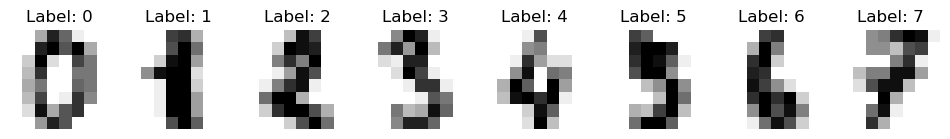

In [183]:
# https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html

digits = datasets.load_digits()   # type = Bunch

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images.
_, axes = plt.subplots(1, 8) # 1 satır ve 4 sütundan oluşan bir grafik düzeni oluştur. (tuple unpacking)
# _ : kullanılmayacak figure objecti
# axes : eksenler dizisi (grafikleri yerleştireceğimiz alanlar)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes, images_and_labels[:8]): # buradaki zip, her bir ekseni bir image-etiket çifti ile eşleştirir.
    # ax: her bir eksen.    axes: eksenler (yukarıda tanımlanan)
    ax.set_axis_off()  # Ekseni gizler, temiz bir görünüm sağlar.
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest') # Görüntüyü gri tonlamalı olarak gösterir.
    # interpolation='nearest'
    # her pikselin rengini, en yakın komşusunun rengini alarak belirler. (nearest-neighbor interpolasyon yöntemi)
    
    ax.set_title('Label: %i' % label)

In [101]:
digits
list(zip(digits.images, digits.target))
type(digits.images)
digits.target
list(zip(axes, images_and_labels[:4]))

[(<Axes: title={'center': 'Label: 0'}>,
  (array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
          [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
          [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
          [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
          [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
          [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
          [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
          [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]),
   0)),
 (<Axes: title={'center': 'Label: 1'}>,
  (array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
          [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
          [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
          [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
          [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
          [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
          [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
          [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]]),
   1)),
 (<Axes: title={'center': 'Label: 2'}>,
  (array([[ 0.,  0.,  0.,  4

In [137]:
np.random.seed(0)
# FLATTENING (DÜZLEŞTİRME)
# turn the data in a (samples, feature) matrix:
data = digits.images.reshape((len(digits.images), -1))  # her bir 8x8'lik görüntüyü 64 boyutlu bir vektöre dönüştürür.
# Her bir image bir sample(örnek) ve her bir piksel bir feature(özellik) olur. (64 özellik)

# create a small neural network classifier
from sklearn.neural_network import MLPClassifier  # a classic neural network
classifier = MLPClassifier(alpha=1e-3)

# Split data into train and test subsets
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(data, digits.target, test_size=0.5, shuffle=False)

# We learn the digits on the first half of the digits
classifier.fit(X_train, y_train)

# Now predict the value of the digit on the second half:
predicted = classifier.predict(X_test)



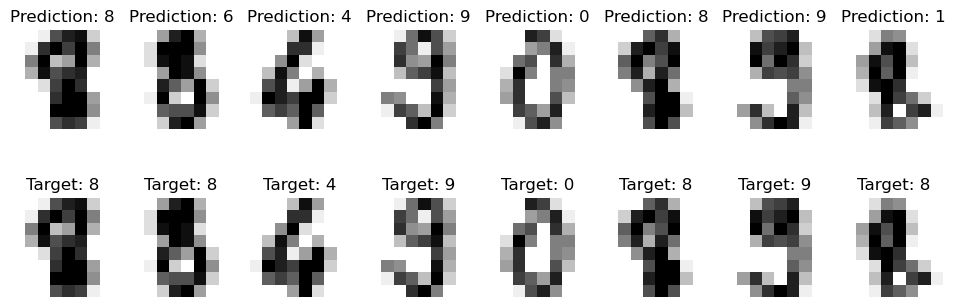

In [185]:
_, axes = plt.subplots(2, 8)  # 2 satır, 8 sütunlu grafik düzeni
images_and_predictions = list(zip(digits.images[len(digits.images) // 2:], predicted))  
images_and_labels = list(zip(digits.images[len(digits.images) // 2:], digits.target[len(digits.target) // 2:]))
# test verisi için veri setini ikiye böldüğümüz için, veri setinin ikinci yarısı üzerinden test yapmalıyız. (// 2)



# İlk satırda tahminleri göster
for ax, (image, prediction) in zip(axes[0], images_and_predictions[:8]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)

# İkinci satırda gerçek etiketleri göster
for ax, (image, label) in zip(axes[1], images_and_labels[:8]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Target: %i' % label)